In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [4]:
# Loading data
df_stroke = pd.read_csv("/healthcare-dataset-stroke-data.csv")
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# Drop ID column
df_stroke.drop(columns=['id'], inplace=True)
df_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# Import the module
from sklearn.preprocessing import StandardScaler

# Scale the numeric columns
df_stroke[['age', 'avg_glucose_level', 'bmi']] = StandardScaler().fit_transform(df_stroke[['age', 'avg_glucose_level', 'bmi']])

df_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,1.051434,0,1,Yes,Private,Urban,2.706375,0.981345,formerly smoked,1
1,Female,0.786070,0,0,Yes,Self-employed,Rural,2.121559,NaN,never smoked,1
2,Male,1.626390,0,1,Yes,Private,Rural,-0.005028,0.459269,never smoked,1
3,Female,0.255342,0,0,Yes,Private,Urban,1.437358,0.701207,smokes,1
4,Female,1.582163,1,0,Yes,Self-employed,Rural,1.501184,-0.623083,never smoked,1


In [7]:
# Get Dummies to transfrom column with encoding function

df_stroke = pd.get_dummies(df_stroke, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
df_stroke.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051434,0,1,2.706375,0.981345,1,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
1,0.786070,0,0,2.121559,NaN,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,1.626390,0,1,-0.005028,0.459269,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3,0.255342,0,0,1.437358,0.701207,1,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
4,1.582163,1,0,1.501184,-0.623083,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False


In [8]:
# Define features set
X = df_stroke.copy()
X.drop("stroke", axis=1, inplace=True)
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051434,0,1,2.706375,0.981345,False,True,False,False,True,...,False,True,False,False,False,True,False,True,False,False
1,0.786070,0,0,2.121559,NaN,True,False,False,False,True,...,False,False,True,False,True,False,False,False,True,False
2,1.626390,0,1,-0.005028,0.459269,False,True,False,False,True,...,False,True,False,False,True,False,False,False,True,False
3,0.255342,0,0,1.437358,0.701207,True,False,False,False,True,...,False,True,False,False,False,True,False,False,False,True
4,1.582163,1,0,1.501184,-0.623083,True,False,False,False,True,...,False,False,True,False,True,False,False,False,True,False


In [10]:
# Define target vector
y = df_stroke["stroke"]
y[:5]


,stroke
0,1
1,1
2,1
3,1
4,1


In [11]:
# Splitting into training tests
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [12]:
# Creating standard scalar instance
scaler = StandardScaler()

In [13]:
# Fitting standard scalar
X_scaler = scaler.fit(X_train)


In [14]:
# Scaling the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Fitting the Random Forrest Model


In [15]:
# Creating Random Forrest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [16]:
# Fit the model
rf_model = rf_model.fit(X_train_scaled, y_train)

Making Predicitions Using the Random Forrest Model

In [17]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
predictions

array([0, 0, 0, ..., 0, 0, 0])

Model Evaluation

In [18]:
# Calculating the Confusion Matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)



In [19]:
# Display Results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1206,4
Actual 1,66,2


Accuracy Score : 0.945226917057903
Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1210
           1       0.33      0.03      0.05        68

    accuracy                           0.95      1278
   macro avg       0.64      0.51      0.51      1278
weighted avg       0.92      0.95      0.92      1278



Feature Importance

In [20]:
# Random Forrest in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.25428194777547636, 'avg_glucose_level'),
 (0.2347548735386312, 'age'),
 (0.2313716877666935, 'bmi'),
 (0.02796711870614311, 'hypertension'),
 (0.026032355508368632, 'heart_disease'),
 (0.021697329090389354, 'smoking_status_never smoked'),
 (0.020390792688912352, 'Residence_type_Rural'),
 (0.020287896460590385, 'work_type_Private'),
 (0.019744120068627743, 'Residence_type_Urban'),
 (0.01973164186223599, 'smoking_status_formerly smoked'),
 (0.018376365735331107, 'smoking_status_smokes'),
 (0.018244921807111965, 'gender_Female'),
 (0.017673367872118522, 'work_type_Self-employed'),
 (0.01764133064625599, 'gender_Male'),
 (0.01706572231485933, 'smoking_status_Unknown'),
 (0.01309399015370017, 'work_type_Govt_job'),
 (0.010422151466063246, 'ever_married_No'),
 (0.009965574489753371, 'ever_married_Yes'),
 (0.0012467679072014333, 'work_type_children'),
 (9.8142803245341e-06, 'work_type_Never_worked'),
 (2.298612117421891e-07, 'gender_Other')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

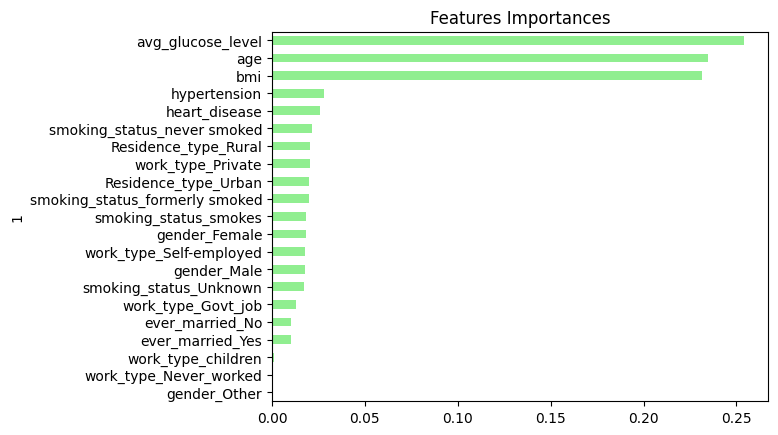

In [21]:
# Visualize the features by importance
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')#.tail(10)
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)